# Getting started:
## (1) import pandas
## (2) create the base data frames of data from understats
Eventually, I'll want to scrape this data from understats. I don't currently know how to do that... more research required. The sticking point is that the table data I want needs to be filtered by home/away and sorted to alphabetical order. Clicking the buttons on the understat UI does not change the url.
Currently, I'm cutting and pasting the table into a google doc and pulling in the data manually.

                         matches  home_goals_scored  home_goals_conceded  \
Arsenal                        5                 12                    6   
Aston Villa                    5                  7                    6   
Bournemouth                    5                  8                    4   
Brentford                      5                 15                    9   
Brighton                       5                  9                    7   
Chelsea                        5                  8                    7   
Crystal Palace                 5                  3                    5   
Everton                        5                  5                    8   
Fulham                         5                  9                    7   
Ipswich                        5                  4                    8   
Leicester                      5                  5                    7   
Liverpool                      5                  9                    3   
Manchester C

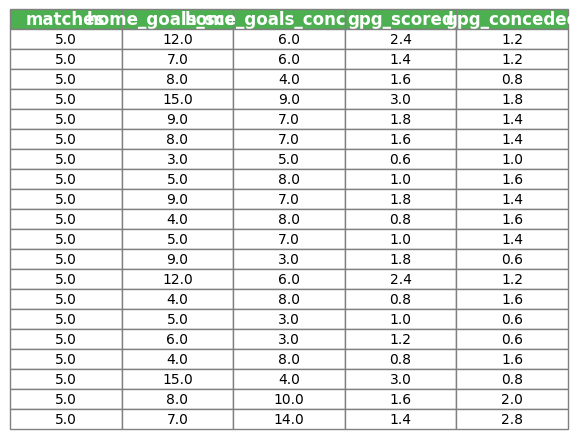

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

clubs = [
    "Arsenal",
    "Aston Villa",
    "Bournemouth",
    "Brentford",
    "Brighton",
    "Chelsea",
    "Crystal Palace",
    "Everton",
    "Fulham",
    "Ipswich",
    "Leicester",
    "Liverpool",
    "Manchester City",
    "Manchester United",
    "Newcastle United",
    "Nottingham Forest",
    "Southampton",
    "Tottenham",
    "West Ham",
    "Wolverhampton Wanderers",
]
# create 'home_results' dataframe
home_goals_scored = [
    12,
    7,
    8,
    15,
    9,
    8,
    3,
    5,
    9,
    4,
    5,
    9,
    12,
    4,
    5,
    6,
    4,
    15,
    8,
    7,
]

home_goals_conceded = [
    6,
    6,
    4,
    9,
    7,
    7,
    5,
    8,
    7,
    8,
    7,
    3,
    6,
    8,
    3,
    3,
    8,
    4,
    10,
    14,
]

matches = [5] * 20

# data = {
#     "club": clubs,
#     "home_goals_scored": home_goals_scored,
#     "home_goals_conceded": home_goals_conceded
# }

data_list = list(zip(matches, home_goals_scored, home_goals_conceded))
# print("DATALIST ==> ", data_list)

home_results_df = pd.DataFrame(data_list, index=clubs, columns=["matches","home_goals_scored", "home_goals_conceded"])

# home_results_df[]

home_results_df["gpg_scored"] = home_results_df["home_goals_scored"] / home_results_df["matches"]
home_results_df["gpg_conceded"] = home_results_df["home_goals_conceded"] / home_results_df["matches"]

print(home_results_df)
# print(home_results_df.loc['Brentford'])
# # print(home_results_df)
# print(home_results_df.loc[home_results_df['club'] == 'Arsenal', 'gpg_scored'].values)

# TRY MAKING A nicer plot of the dataframe:

fig, ax = plt.subplots(figsize=(6,2))
ax.axis('off')

table = ax.table(
    cellText=home_results_df.values,
    colLabels=home_results_df.columns,
    cellLoc='center',
    loc='center'
)

table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.2, 1.2)

for i, cell in table.get_celld().items():
    cell.set_edgecolor('grey')
    if i[0] == 0:
        cell.set_fontsize(12)
        cell.set_text_props(weight='bold')
        cell.set_facecolor('#4CAF50')  # Header color
        cell.set_text_props(color='white')

plt.show()



In [2]:
# away dataframe with away data
away_goals_scored = [
    5,
    10,
    5,
    4,
    8,
    12,
    5,
    5,
    5,
    6,
    9,
    10,
    9,
    5,
    5,
    8,
    3,
    7,
    5,
    7,
]

away_goals_conceded = [
    5,
    9,
    8,
    11,
    7,
    5,
    8,
    9,
    6,
    13,
    11,
    3,
    5,
    4,
    7,
    4,
    11,
    7,
    9,
    13,   
]

data = {
    "club": clubs,
    "away_goals_scored": away_goals_scored,
    "away_goals_conceded": away_goals_conceded
}

away_results_df = pd.DataFrame(data)

# all clubs have played the same number of matches, this won't always be true
away_results_df["matches"] = 5
away_results_df["gpg_scored"] = away_results_df["away_goals_scored"] / away_results_df["matches"]
away_results_df["gpg_conceded"] = away_results_df["away_goals_conceded"] / away_results_df["matches"]
print(away_results_df)

                       club  away_goals_scored  away_goals_conceded  matches  \
0                   Arsenal                  5                    5        5   
1               Aston Villa                 10                    9        5   
2               Bournemouth                  5                    8        5   
3                 Brentford                  4                   11        5   
4                  Brighton                  8                    7        5   
5                   Chelsea                 12                    5        5   
6            Crystal Palace                  5                    8        5   
7                   Everton                  5                    9        5   
8                    Fulham                  5                    6        5   
9                   Ipswich                  6                   13        5   
10                Leicester                  9                   11        5   
11                Liverpool             

In [3]:
'''Define clubs to query'''
home_club = 'Brentford'
away_club = 'Bournemouth'

if home_club not in clubs:
    print('ERROR: check home_club spelling')
    
elif away_club not in clubs:
    print('ERROR: check away_club spelling')

else:
    lg_avg_scored_at_home = round(sum(home_results_df['gpg_scored'].values) / 20, 2) 
    print("======= LEAGUE AVG =======\nHome Avg Scored:", lg_avg_scored_at_home)
    lg_avg_scored_away = round(sum(home_results_df['gpg_conceded'].values) / 20, 2)
    print("Away Avg Scored:", lg_avg_scored_away)
    
    
    home_club_avg_scored = home_results_df.loc[home_results_df['club'] == home_club, 'gpg_scored'].values[0]
    print(f"\n\n==== HOME SCORE DATA ==== \n{home_club} Avg Scored:", home_club_avg_scored)
    away_club_avg_conceded = away_results_df.loc[away_results_df['club'] == away_club, 'gpg_conceded'].values[0]
    print(f"{away_club} Avg Conceded:", away_club_avg_conceded)
    
    away_club_avg_scored = away_results_df.loc[away_results_df['club'] == away_club, 'gpg_scored'].values[0]
    print(f"\n\n==== AWAY SCORE DATA ====\n{away_club} Avg Scored:", away_club_avg_scored)
    home_club_avg_conceded = home_results_df.loc[home_results_df['club'] == home_club, 'gpg_conceded'].values[0]
    print(f"{home_club} Avg Conceded", home_club_avg_conceded)

======= LEAGUE AVG =======
Home Avg Scored: 1.55
Away Avg Scored: 1.33


==== HOME SCORE DATA ==== 
Brentford Avg Scored: 3.0
Bournemouth Avg Conceded: 1.6


==== AWAY SCORE DATA ====
Bournemouth Avg Scored: 1.0
Brentford Avg Conceded 1.8


In [4]:
home_attack_rating = home_club_avg_scored / lg_avg_scored_at_home
# print(home_attack_rating)
away_defense_rating = away_club_avg_conceded / lg_avg_scored_at_home
# print(away_defense_rating)
away_attack_rating = away_club_avg_scored / lg_avg_scored_away
# print(away_attack_rating)
home_defense_rating = home_club_avg_conceded / lg_avg_scored_away
# print(home_defense_rating)

projected_home_goals = home_attack_rating * away_defense_rating * lg_avg_scored_at_home
print(f"{home_club} (home) Projected Goals: ", projected_home_goals)

projected_away_goals = away_attack_rating * home_defense_rating * lg_avg_scored_away
print(f"{away_club} (away) Projected Goals: ", projected_away_goals)

projected_total_goals = projected_home_goals + projected_away_goals
print("Projected Total: ", projected_total_goals)

Brentford (home) Projected Goals:  3.0967741935483866
Bournemouth (away) Projected Goals:  1.3533834586466165
Projected Total:  4.450157652195003


In [4]:
from scipy.stats import poisson

# HOME GOAL TABLE
home_goal_data = {"goals": [], "prob": []}
for i in range(9):
    prob = poisson.pmf(i, projected_home_goals)
    home_goal_data["goals"].append(i)
    home_goal_data["prob"].append(prob)
home_goal_prob = pd.DataFrame(home_goal_data)
print(f"=== {home_club} (home) Goal Probaility ===\n", home_goal_prob)

# AWAY GOAL TABLE
away_goal_data = {"goals": [], "prob": []}
for i in range(9):
    prob = poisson.pmf(i, projected_away_goals)
    away_goal_data["goals"].append(i)
    away_goal_data["prob"].append(prob)
away_goal_prob = pd.DataFrame(away_goal_data)
print(f"=== {away_club} (away) Goal Probaility ===\n", away_goal_prob)

# EXACT SCORE TABLE
occurences = away_goal_data["goals"]
exact_score_table = pd.DataFrame(index=away_goal_data["goals"], columns = home_goal_data["goals"])
for x in occurences:
    for y in occurences:
        home_prob = float(home_goal_prob.loc[home_goal_prob['goals'] == y, 'prob'])
        away_prob = float(away_goal_prob.loc[away_goal_prob['goals'] == x, 'prob'])
        exact_score_table.loc[x,y] = home_prob * away_prob * 100
        # exact_score_table.loc[x, y] = float(home_goal_prob.loc[home_goal_prob['goals'] == x, 'prob']) * float(away_goal_prob.loc[away_goal_prob['goals'] == y, 'prob'])

print(exact_score_table)

NameError: name 'projected_home_goals' is not defined

In [ ]:
# check axis on the table
# plot it nicely
# create the outcome odds
# post needs to show the direction we're going (scrape the table data?)